In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv('/Users/aoamacsplace/Documents/mosaic/Aave/Datasets/export-simple-userdata-aave.csv')
data.head(20)


,Address,Name,Is delegator,Avatar,Space,Ens name,Follow Count,Follows Space,Total Votes,Proposal Interaction,Proposal Interaction In Space,Proposal Interaction outside of Space,Total NFT`s,Total Rewards NFT`s,User is delegator
0,0x329c54289Ff5D6B7b7daE13592C6B1EDA1543eD4,NaN,0,NaN,aave.eth,aavechan.eth,7,1,3.392825e+07,527,256,271,1,0,0
1,0xB83b3e9C8E3393889Afb272D354A7a3Bd1Fbcf5C,NaN,0,NaN,aave.eth,lbsblockchain.eth,1,1,1.485489e+07,184,184,0,0,0,0
2,0x13BDaE8c5F0fC40231F0E6A4ad70196F59138548,NaN,0,NaN,aave.eth,michiganblockchain.eth,2,1,7.785688e+06,151,96,55,0,0,0
3,0xB933AEe47C438f22DE0747D57fc239FE37878Dd1,NaN,0,NaN,aave.eth,wintermutegovernance.eth,17,1,6.334191e+06,307,151,156,23,0,0
4,0x55B16934C3661E1990939bC57322554d9B09f262,Llama Proposal Power,0,ipfs://bafkreidlvzco3qpbpwir5xmln4zygbyxtcfixn...,aave.eth,NaN,2,1,3.722838e+06,57,57,0,0,0,0
5,0xaFDAbFb6227507fF6522b8a242168F6b5F353a6E,NaN,0,NaN,aave.eth,NaN,0,0,3.126521e+06,33,33,0,0,0,0
6,0xc17cB209D5aBdb2d00f566a1E48F558DEBC264E1,NaN,0,NaN,aave.eth,aave.standard-crypto.eth,1,1,3.026690e+06,25,25,0,0,0,0
7,0xdD709cAE362972cb3B92DCeaD77127f7b8D58202,NaN,0,NaN,aave.eth,defimaximalist.eth,10,1,2.827637e+06,188,15,173,0,0,0
8,0xdC1F98682F4F8a5c6d54F345F448437b83f5E432,NaN,0,NaN,aave.eth,blockchaincolumbia.eth,10,1,2.420743e+06,66,29,37,0,0,0
9,0x9B5ea8C719e29A5bd0959FaF79C9E5c8206d0499,NaN,0,NaN,aave.eth,NaN,1,0,1.255712e+06,181,12,169,0,0,0


In [3]:
data.columns

Index(['Address', 'Name', 'Is delegator', 'Avatar', 'Space', 'Ens name',
       'Follow Count', 'Follows Space', 'Total Votes', 'Proposal Interaction',
       'Proposal Interaction In Space',
       'Proposal Interaction outside of Space', 'Total NFT`s',
       'Total Rewards NFT`s', 'User is delegator'],
      dtype='object')

In [13]:
data['User is delegator'].value_counts()

0    1650
Name: User is delegator, dtype: int64

In [19]:
df = data.copy()

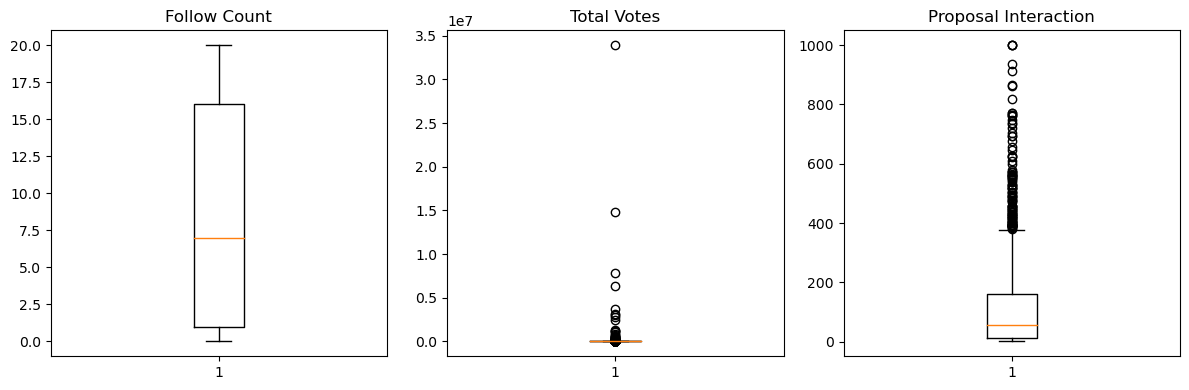

In [6]:
import plotly.express as px

# Scatterplot Matrix
fig = px.scatter_matrix(data, dimensions=['Follow Count', 'Total Votes'], color='Proposal Interaction',
                        title='User Engagement and Proposal Interaction',
                        labels={'Follow Count': 'Follow Count', 'Total Votes': 'Total Votes',
                                'Proposal Interaction': 'Proposal Interaction'})
fig.update_traces(marker=dict(size=10))
fig.show()

# Subplots of Boxplots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].boxplot(data['Follow Count'])
axs[0].set_title('Follow Count')

axs[1].boxplot(data['Total Votes'])
axs[1].set_title('Total Votes')

axs[2].boxplot(data['Proposal Interaction'])
axs[2].set_title('Proposal Interaction')

plt.tight_layout()
plt.show()


In [ ]:
#Delegator analysis

In [15]:

import plotly.graph_objects as go
import plotly.express as px

# Delegator count and percentage
delegator_count = data['Is delegator'].sum()
total_users = len(data)
delegator_percentage = (delegator_count / total_users) * 100

# Pie chart of delegators vs non-delegators
fig = px.pie(
    names=['Delegators', 'Non-Delegators'],
    values=[delegator_count, total_users - delegator_count],
    title='Delegators vs Non-Delegators'
)
fig.show()



# Total votes cast by delegators vs non-delegators
fig = go.Figure()
fig.add_trace(go.Box(x=data['Is delegator'], y=data['Total Votes'], boxmode='group', name='Total Votes'))
fig.update_layout(title='Total Votes Cast by Delegators vs Non-Delegators')
fig.show()

# Proposal interaction of delegators
fig = px.histogram(
    data[data['Is delegator']],
    x='Proposal Interaction',
    title='Proposal Interaction of Delegators'
)
fig.show()




KeyError: 1

In [35]:
import plotly.express as px
import numpy as np

# Filter the dataframe for delegators and non-delegators
delegators = df[df['Is delegator'] == 1]
non_delegators = df[df['Is delegator'] == 0]

# Create a scatter plot to compare Proposal Interaction and Total Votes for delegators and non-delegators
fig = px.scatter(df, x='Proposal Interaction', y='Total Votes', color='Is delegator',
                 hover_data=['Ens name'],
                 labels={'Proposal Interaction': 'Proposal Interaction', 'Total Votes': 'Total Votes'},
                 title='Voting Behavior Analysis')

# Update legend labels
fig.for_each_trace(lambda t: t.update(name='Delegator' if t.name == '1' else 'Non-Delegator'))

# Set y-axis scale to logarithmic
fig.update_yaxes(type='log')

# Adjust y-axis range
y_max = np.log10(df['Total Votes'].max()) + 0.2  # Add a small offset for better visibility
fig.update_yaxes(range=[0, y_max])

# Display the figure
fig.show()


In [37]:
import plotly.graph_objects as go

# Total votes cast by delegators vs non-delegators
fig = go.Figure()

fig.add_trace(go.Violin(x=data['Is delegator'], y=data['Total Votes'], name='Total Votes',
                        box_visible=True, meanline_visible=True))

fig.update_layout(title='Total Votes Cast by Delegators vs Non-Delegators')

fig.show()


In [41]:
import plotly.express as px

# Proposal interaction of delegators
fig = px.histogram(
    df.loc[df['Is delegator'] == 0, 'Proposal Interaction'],  # Use .loc to index the DataFrame
    x='Proposal Interaction',
    title='Proposal Interaction of Delegators'
)
fig.show()
